In [1]:
print("Hello world")

Hello world


In [2]:
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv('./train_data.csv')
test_df = pd.read_csv('./test_data.csv')

In [12]:
train_df.isnull().sum()

feature1    0
feature2    0
target      0
dtype: int64

In [13]:
test_df.isnull().sum()

feature1    0
feature2    0
target      0
dtype: int64

In [11]:
ones = train_df[train_df['target'] == 1]
zero = train_df[train_df['target'] == 0]

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = SVC(kernel = 'linear', C = 0.2)

feat = np.column_stack([train_df['feature1'], train_df['feature2']])
tgt = np.array(train_df['target'])

sc = StandardScaler()
feat = sc.fit_transform(feat)

svc.fit(feat, tgt)

SVC(C=0.2, kernel='linear')

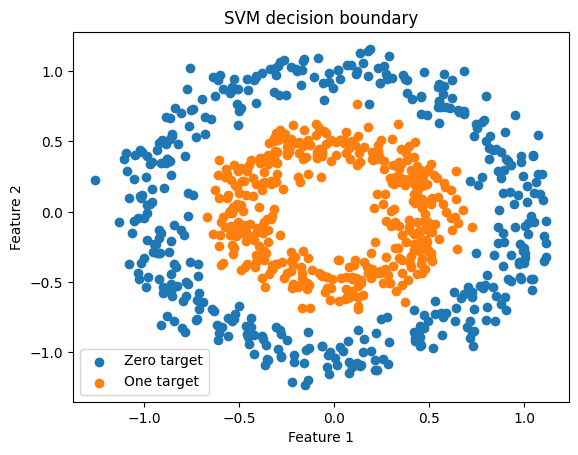

In [10]:
from matplotlib import pyplot as plt

plt.title("SVM decision boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(zero['feature1'], zero['feature2'], label = "Zero target")
plt.scatter(ones['feature1'], ones['feature2'], label = "One target")
plt.legend()

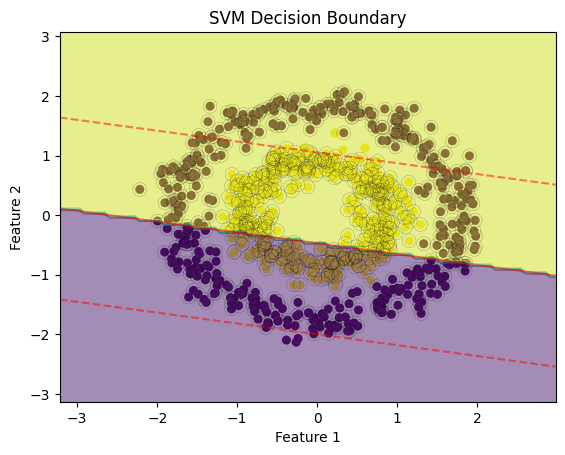

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_svm_bdry(svc, feat, tgt):
    clf1 = svc

    # plot the decision function
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf1,
        feat,
        plot_method="contour",
        colors="r",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax
    )



    plt.scatter(feat[:, 0], feat[:, 1], c = tgt, s=30)


    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    DecisionBoundaryDisplay.from_estimator(
        clf1, feat, response_method="predict",
        alpha=0.5, ax = ax
    )

    # plot support vectors
    ax.scatter(
        clf1.support_vectors_[:, 0],
        clf1.support_vectors_[:, 1],
        s=100,
        linewidth=0.1,
        facecolors="none",
        edgecolors="k"
    )

plot_svm_bdry(svc, feat, tgt)

In [18]:
from sklearn.metrics import classification_report

tr_pred = svc.predict(feat)
print("The classification report is\n", classification_report(tgt, tr_pred))

The classification report is
               precision    recall  f1-score   support

           0       0.60      0.43      0.50       400
           1       0.56      0.71      0.62       400

    accuracy                           0.57       800
   macro avg       0.58      0.57      0.56       800
weighted avg       0.58      0.57      0.56       800



In [19]:
test_feat = np.column_stack([test_df['feature1'], test_df['feature2']])
test_tgt = np.array(test_df['target'])

In [21]:
test_df['svm_prediction'] = svc.predict(test_feat)
test_df

,feature1,feature2,target,svm_prediction
0,-0.183067,0.390134,1,1
1,0.168505,0.869701,0,1
2,-0.370716,-0.151243,1,1
3,-0.174255,1.020947,0,1
4,0.180431,-0.649801,1,0
...,...,...,...,...
195,0.682261,0.593896,0,1
196,-0.445419,0.094120,1,1
197,0.862200,-0.094400,0,1
198,-0.321888,0.404748,1,1


In [23]:
# SVC for different kernels

# SVC for sigmoid
sig = SVC(C = 0.2, kernel = 'sigmoid')
sig.fit(feat, tgt)

# SVC for poly
poly = SVC(C = 0.2, kernel = 'poly')
poly.fit(feat, tgt)

# SVC for rbf
rbf = SVC(C = 0.2, kernel = 'rbf')
rbf.fit(feat, tgt)

SVC(C=0.2)

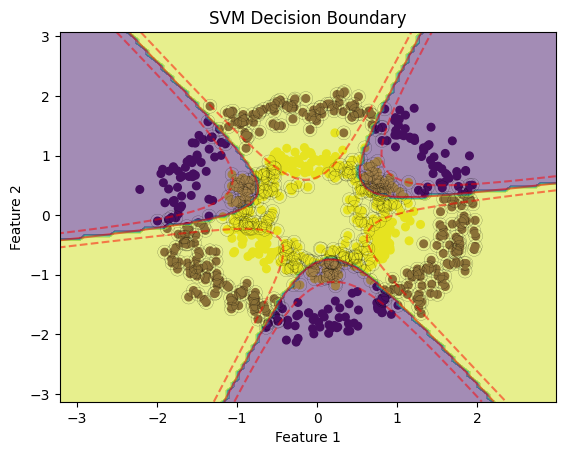

In [25]:
plot_svm_bdry(sig, feat, tgt)

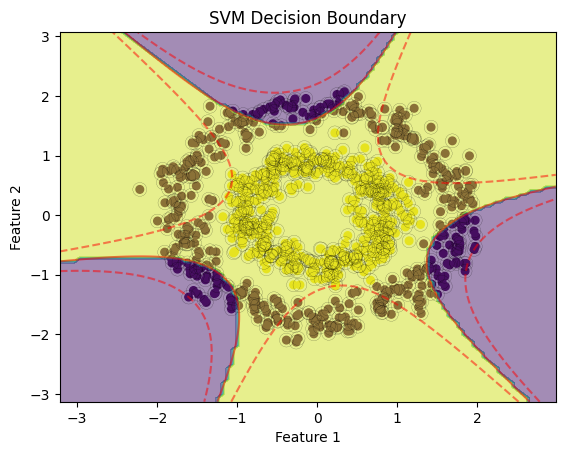

In [26]:
plot_svm_bdry(poly, feat, tgt)

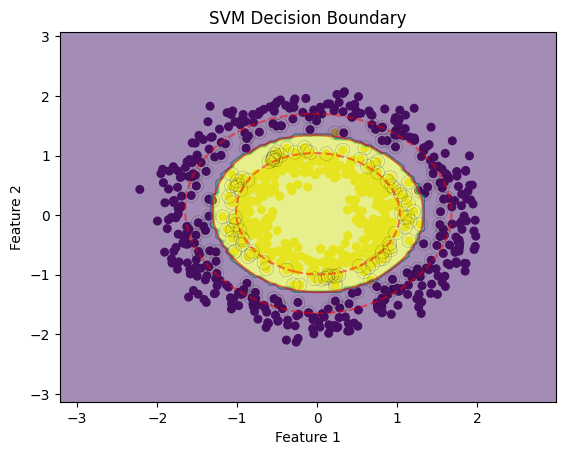

In [27]:
plot_svm_bdry(rbf, feat, tgt)

In [29]:
tr_pred_poly = poly.predict(feat)
tr_pred_sig = sig.predict(feat)
tr_pred_rbf = rbf.predict(feat)

In [30]:
print("The classification report for Poly\n", classification_report(tgt, tr_pred_poly))
print("The classification report for Sigmoid\n", classification_report(tgt, tr_pred_sig))
print("The classification report for RBF\n", classification_report(tgt, tr_pred_rbf))

The classification report for Poly
               precision    recall  f1-score   support

           0       1.00      0.26      0.42       400
           1       0.58      1.00      0.73       400

    accuracy                           0.63       800
   macro avg       0.79      0.63      0.57       800
weighted avg       0.79      0.63      0.57       800

The classification report for Sigmoid
               precision    recall  f1-score   support

           0       0.67      0.44      0.53       400
           1       0.58      0.78      0.67       400

    accuracy                           0.61       800
   macro avg       0.63      0.61      0.60       800
weighted avg       0.63      0.61      0.60       800

The classification report for RBF
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg      

In [32]:
test_tgt_poly = poly.predict(test_feat)
test_tgt_sig = sig.predict(test_feat)
test_tgt_rbf = rbf.predict(test_feat)

In [33]:
test_df['poly_kernel_prediction'] = test_tgt_poly
test_df['sigmoid_kernel_prediction'] = test_tgt_sig
test_df['rbf_kernel_prediction'] = test_tgt_rbf

In [35]:
test_df.head()

,feature1,feature2,target,svm_prediction,poly_kernel_prediction,sigmoid_kernel_prediction,rbf_kernel_prediction
0,-0.183067,0.390134,1,1,1,1,1
1,0.168505,0.869701,0,1,1,1,1
2,-0.370716,-0.151243,1,1,1,1,1
3,-0.174255,1.020947,0,1,1,1,1
4,0.180431,-0.649801,1,0,1,1,1


In [ ]:
test_df.to_csv('./week6_predictions.csv')

In [37]:
df = pd.read_csv('./UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [38]:
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [39]:
features = df.drop(columns = ['CreditCard'])
target = df['CreditCard']

In [ ]:
sc = StandardScaler()
features = sc.fit_transform(features)
target = np.array(target)
features

array([[-1.73170443, -1.77441684, -1.66607847, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-1.73101161, -0.02952359, -0.09633022, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.34142334,
        -0.25354028,  0.82195086]])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 42)

In [42]:
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'C': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}

In [44]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
gcv = GridSearchCV(svc, param_grid = param_grid, verbose = 3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5] END C=1e-05, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.3s
[CV 2/5] END C=1e-05, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.2s
[CV 3/5] END C=1e-05, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.2s
[CV 4/5] END C=1e-05, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.2s
[CV 5/5] END C=1e-05, degree=2, gamma=scale, kernel=rbf;, score=0.705 total time=   0.2s
[CV 1/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.704 total time=   0.1s
[CV 2/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.704 total time=   0.1s
[CV 3/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.704 total time=   0.2s
[CV 4/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.704 total time=   0.1s
[CV 5/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.705 total time=   0.1s
[CV 1/5] END C=1e-05, degree=2, gamma=sca

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [45]:
gcv.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
"""
    Linear classifier is worse than others
    Polynomial: medium
    Sigmoid: medium
    RBF: Best
"""

In [46]:
preds = gcv.predict(X_test)
preds

array([0, 0, 0, ..., 0, 1, 1])

In [47]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       889
           1       0.88      0.17      0.28       361

    accuracy                           0.75      1250
   macro avg       0.81      0.58      0.57      1250
weighted avg       0.78      0.75      0.69      1250

